In [1]:
import sys
sys.executable

'c:\\Users\\carlo\\miniforge3\\envs\\dtu02452\\python.exe'

In [ ]:
from pathlib import Path
import pandas as pd
import mne
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
import pyedflib
from mne.time_frequency import psd_array_welch
from IPython.display import display
from scipy.signal import welch

In [3]:
data = Path(r"C:\Users\carlo\OneDrive - Universidade de Lisboa\Documents\GitHub\heart-lung-brain-coupling-for-RBD\Data\cap-sleep-database-1.0.0\rbd1.edf")
raw = mne.io.read_raw_edf(data, preload=False, verbose=False)
raw.load_data()
raw.info["sfreq"], len(raw.ch_names), raw.ch_names[:10]

Reading 0 ... 15498751  =      0.000 ... 30270.998 secs...


C:\Users\carlo\AppData\Local\Temp\ipykernel_32376\2187068028.py:2: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data, preload=False, verbose=False)
C:\Users\carlo\AppData\Local\Temp\ipykernel_32376\2187068028.py:2: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data, preload=False, verbose=False)
C:\Users\carlo\AppData\Local\Temp\ipykernel_32376\2187068028.py:2: RuntimeWarning: Highpass cutoff frequency 10.0 is greater than lowpass cutoff frequency 3.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data, preload=False, verbose=False)


(512.0,
 15,
 ['ROC-LOC',
  'Fp2-F4',
  'F4-C4',
  'C4-P4',
  'P4-O2',
  'C4-A1',
  'EMG1-EMG2',
  'ECG1-ECG2',
  'DX1-DX2',
  'SX1-SX2'])

In [4]:
eeg_chs  = ["Fp2-F4", "F4-C4", "C4-P4", "P4-O2", "C4-A1", "F8-T4", "F7-T3"]
ecg_chs  = ["ECG1-ECG2"]
resp_chs = ["TORACE", "ADDOME"]
eog_chs  = ["ROC-LOC"]

In [5]:
raw.get_channel_types(picks=eeg_chs[:5] + ecg_chs + resp_chs)
print("Sampling frequency:", raw.info["sfreq"])
print("Duration (s):", raw.n_times / raw.info["sfreq"])

Sampling frequency: 512.0
Duration (s): 30271.0


In [6]:
txt_path = r"C:\Users\carlo\OneDrive - Universidade de Lisboa\Documents\GitHub\heart-lung-brain-coupling-for-RBD\Data\cap-sleep-database-1.0.0\rbd1.txt"
df = pd.read_csv(txt_path, sep='\t', header=None, names=["Sleep Stage", "Position", "Time [hh:mm:ss]", "Event", "Duration[s]", "Location"], skiprows=22)
df.head()

,Sleep Stage,Position,Time [hh:mm:ss],Event,Duration[s],Location
0,W,Unknown Position,23:07:19,SLEEP-S0,30,ROC-LOC
1,W,Unknown Position,23:07:49,SLEEP-S0,30,ROC-LOC
2,W,Unknown Position,23:08:19,SLEEP-S0,30,ROC-LOC
3,W,Unknown Position,23:08:49,SLEEP-S0,30,ROC-LOC
4,W,Unknown Position,23:09:19,SLEEP-S0,30,ROC-LOC


In [7]:
epoch_len = 30.0
df["onset_s"] = np.arange(len(df)) * epoch_len

# WAKE EPOCHS
wake = df[df["Sleep Stage"] == "W"]
print(len(wake), wake.head())
wake = df[df["Sleep Stage"] == "W"].copy()
wake_epochs = list(zip(wake["onset_s"].to_numpy(), (wake["onset_s"] + wake["Duration[s]"]).to_numpy()))
t0_wake, t1_wake = wake_epochs[0]
dur_wake = float(t1_wake - t0_wake)
t0_wake, t1_wake, dur_wake

# REM EPOCHS
rem = df[df["Sleep Stage"] == "R"]
print(len(rem), rem.head())

rem = df[df["Sleep Stage"] == "R"].copy()
rem_epochs = list(zip(rem["onset_s"].to_numpy(), (rem["onset_s"] + rem["Duration[s]"]).to_numpy()))

t0_rem, t1_rem = rem_epochs[0]
dur_rem = float(t1_rem - t0_rem)
t0_rem, t1_rem, dur_rem

#S1 EPOCHS
S1 = df[df["Sleep Stage"] == "S1"]
print(len(S1), S1.head())

S1 = df[df["Sleep Stage"] == "S1"].copy()
S1_epochs = list(zip(S1["onset_s"].to_numpy(), (S1["onset_s"] + S1["Duration[s]"]).to_numpy()))

t0_S1, t1_S1 = S1_epochs[0]
dur_S1 = float(t1_S1 - t0_S1)
t0_S1, t1_S1, dur_S1

# S2 EPOCHS
S2 = df[df["Sleep Stage"] == "S2"]
print(len(S2), S2.head())

S2 = df[df["Sleep Stage"] == "S2"].copy()
S2_epochs = list(zip(S2["onset_s"].to_numpy(), (S2["onset_s"] + S2["Duration[s]"]).to_numpy()))
t0_S2, t1_S2 = S2_epochs[0]
dur_S2 = float(t1_S2 - t0_S2)
t0_S2, t1_S2, dur_S2

# S3 EPOCHS
S3 = df[df["Sleep Stage"] == "S3"]
print(len(S3), S3.head())

S3 = df[df["Sleep Stage"] == "S3"].copy()
S3_epochs = list(zip(S3["onset_s"].to_numpy(), (S3["onset_s"] + S3["Duration[s]"]).to_numpy()))
t0_S3, t1_S3 = S3_epochs[0]
dur_S3 = float(t1_S3 - t0_S3)
t0_S3, t1_S3, dur_S3

# S4 EPOCHS
S4 = df[df["Sleep Stage"] == "S4"]
print(len(S4), S4.head())
S4 = df[df["Sleep Stage"] == "S4"].copy()
S4_epochs = list(zip(S4["onset_s"].to_numpy(), (S4["onset_s"] + S4["Duration[s]"]).to_numpy()))
t0_S4, t1_S4 = S4_epochs[0]
dur_S4 = float(t1_S4 - t0_S4)
t0_S4, t1_S4, dur_S4

72   Sleep Stage          Position Time [hh:mm:ss]     Event  Duration[s]  \
0           W  Unknown Position        23:07:19  SLEEP-S0           30   
1           W  Unknown Position        23:07:49  SLEEP-S0           30   
2           W  Unknown Position        23:08:19  SLEEP-S0           30   
3           W  Unknown Position        23:08:49  SLEEP-S0           30   
4           W  Unknown Position        23:09:19  SLEEP-S0           30   

  Location  onset_s  
0  ROC-LOC      0.0  
1  ROC-LOC     30.0  
2  ROC-LOC     60.0  
3  ROC-LOC     90.0  
4  ROC-LOC    120.0  
126     Sleep Stage          Position Time [hh:mm:ss]      Event  Duration[s]  \
454           R  Unknown Position        01:44:49  SLEEP-REM           30   
455           R  Unknown Position        01:45:19  SLEEP-REM           30   
456           R  Unknown Position        01:45:49  SLEEP-REM           30   
457           R  Unknown Position        01:46:19  SLEEP-REM           30   
458           R  Unknown Positi

(np.float64(1890.0), np.float64(1920.0), 30.0)

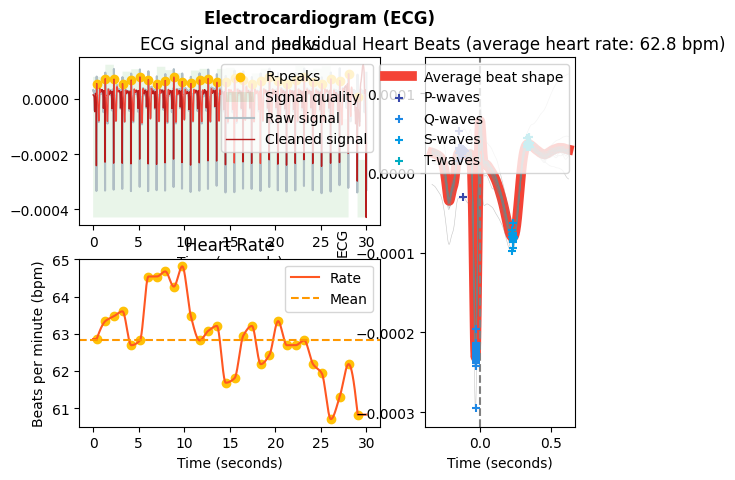

In [27]:
# Raw ECG in Rem Sleep 
sf = raw.info["sfreq"]
ecg_1d = raw.copy().pick(ecg_chs).load_data().get_data()[0]
a, b = int(t0_rem*sf), int(t1_rem*sf)
ecg_seg = ecg_1d[a:b]

signals, info = nk.ecg_process(ecg_seg, sampling_rate=sf)
fig = nk.ecg_plot(signals, info)

Creating RawArray with float64 data, n_channels=1, n_times=15498752
    Range : 0 ... 15498751 =      0.000 ... 30270.998 secs
Ready.


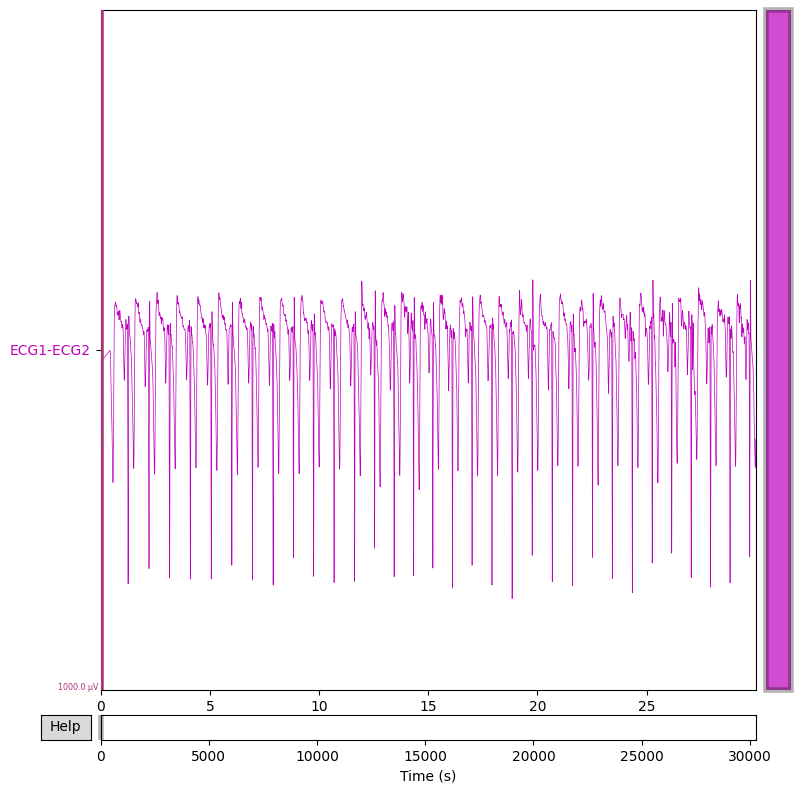

In [26]:
# Filter ECG 
ecg_data = ecg.get_data()[0]
ecg_filtered = nk.ecg_clean(ecg_data, sampling_rate=raw.info["sfreq"], method="neurokit", lowcut=0.5, highcut=45)
# Create a new Raw object for plotting
info = mne.create_info(ch_names=ecg_chs, sfreq=raw.info["sfreq"], ch_types=['ecg'])
ecg_filtered_raw = mne.io.RawArray(ecg_filtered.reshape(1, -1), info)
fig = ecg_filtered_raw.plot(start=0, duration=dur_rem, scalings=dict(eeg=30e-6), title="ECG — FILTERED", show=True)

In [40]:

sf = raw.info["sfreq"]
ecg_ch = ecg_chs[0]  

ecg_sig_total = raw.copy().pick([ecg_ch]).load_data().get_data()[0]
ecg_clean_total = nk.ecg_clean(ecg_sig_total, sampling_rate=sf, method="neurokit")

print(len(ecg_sig_total), len(ecg_clean_total))


15498752 15498752


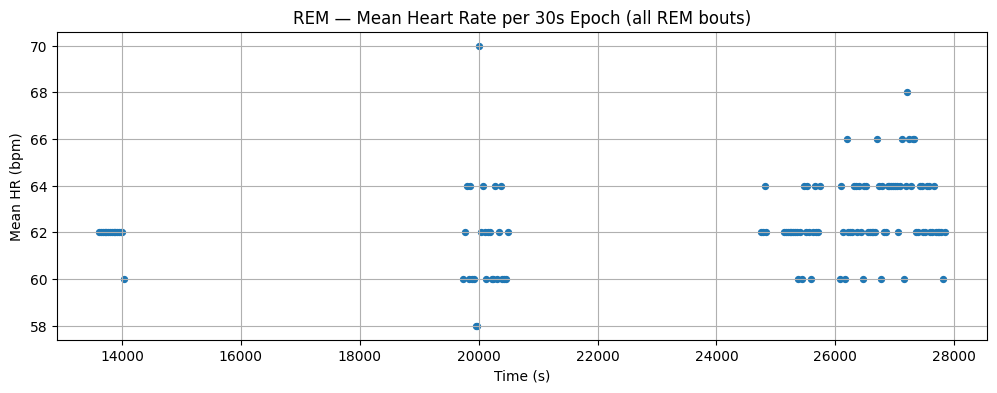

In [29]:
rows = []
for i, (t0_rem, t1_rem) in enumerate(rem_epochs):
    a, b = int(t0_rem*sf), int(t1_rem*sf)
    x = ecg_1d[a:b]
    try:
        x_clean = nk.ecg_clean(x, sampling_rate=sf, method="neurokit")
        _, info = nk.ecg_peaks(x_clean, sampling_rate=sf)
        n_peaks = len(info["ECG_R_Peaks"])
        hr_mean = 60.0 * n_peaks / (t1_rem - t0_rem)   # bpm over that epoch
        rows.append({"epoch": i, "start_s": float(t0_rem), "hr_mean_bpm": hr_mean, "ok": True})
    except Exception:
        rows.append({"epoch": i, "start_s": float(t0_rem), "hr_mean_bpm": np.nan, "ok": False})

rem_hr = pd.DataFrame(rows)

plt.figure(figsize=(12,4))
plt.scatter(rem_hr.loc[rem_hr.ok, "start_s"], rem_hr.loc[rem_hr.ok, "hr_mean_bpm"], s=18)
plt.xlabel("Time (s)")
plt.ylabel("Mean HR (bpm)")
plt.title("REM — Mean Heart Rate per 30s Epoch (all REM bouts)")
plt.grid(True)
plt.show()

In [47]:
stage_epochs = {"W": wake_epochs, "R": rem_epochs, "S1": S1_epochs, "S2": S2_epochs, "S3": S3_epochs, "S4": S4_epochs,}

def extract_ecg_per_epoch(ecg_sig_total, ecg_clean_total, t0, t1, epochs, sf, detect_peaks=True):
    rows = []
    for i, (t0, t1) in enumerate(epochs):
        a, b = int(t0 * sf), int(t1 * sf)

        x_raw = ecg_sig_total[a:b]
        x_cln = ecg_clean_total[a:b]

        try:
            if detect_peaks:
                _, info = nk.ecg_peaks(x_cln, sampling_rate=sf)
                rpeaks = info["ECG_R_Peaks"]
                n_peaks = int(len(rpeaks))
            else:
                rpeaks = None
                n_peaks = 0

            rows.append({"epoch": i, "t0_s": float(t0), "t1_s": float(t1), "dur_s": float(t1 - t0), "raw_seg": x_raw, "clean_seg": x_cln, "rpeaks": rpeaks, "n_peaks": n_peaks, "ok": True})

        except Exception as e:
            rows.append({"epoch": i,  "t0_s": float(t0), "t1_s": float(t1), "dur_s": float(t1 - t0), "raw_seg": x_raw, "clean_seg": x_cln, "rpeaks": None, "n_peaks": 0,  "ok": False, "error": str(e)})

    return pd.DataFrame(rows)



In [48]:
ecg_R  = extract_ecg_per_epoch(ecg_sig_total, ecg_clean_total, t0_rem, t1_rem, rem_epochs, sf)
ecg_S1 = extract_ecg_per_epoch(ecg_sig_total, ecg_clean_total, t0_S1, t1_S1, S1_epochs, sf)
ecg_S2 = extract_ecg_per_epoch(ecg_sig_total, ecg_clean_total, t0_S2, t1_S2, S2_epochs, sf)
ecg_S3 = extract_ecg_per_epoch(ecg_sig_total, ecg_clean_total, t0_S3, t1_S3, S3_epochs, sf)
ecg_S4 = extract_ecg_per_epoch(ecg_sig_total, ecg_clean_total, t0_S4, t1_S4, S4_epochs, sf)
ecg_W  = extract_ecg_per_epoch(ecg_sig_total, ecg_clean_total, t0_wake, t1_wake, wake_epochs, sf)


In [50]:
def concat_clean_stage(df_stage, sf, gap_s=2.0):
    gap = np.full(int(gap_s * sf), np.nan)
    parts = []
    for _, r in df_stage[df_stage["ok"]].iterrows():
        parts.append(r["clean_seg"])
        parts.append(gap)
    return np.concatenate(parts[:-1]) if len(parts) else np.array([])

ecg_clean_rem  = concat_clean_stage(ecg_R, sf)
ecg_clean_s1   = concat_clean_stage(ecg_S1, sf)
ecg_clean_s2   = concat_clean_stage(ecg_S2, sf)
ecg_clean_s3   = concat_clean_stage(ecg_S3, sf)
ecg_clean_s4   = concat_clean_stage(ecg_S4, sf)
ecg_clean_wake = concat_clean_stage(ecg_W, sf)


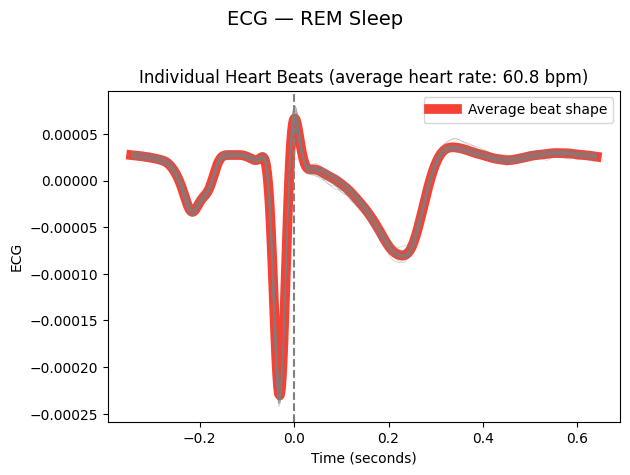

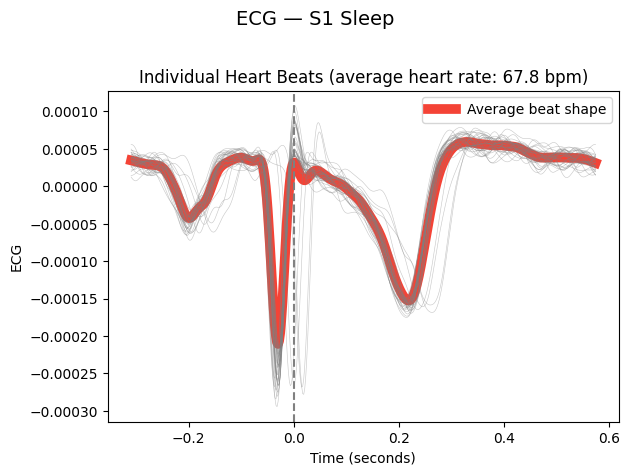

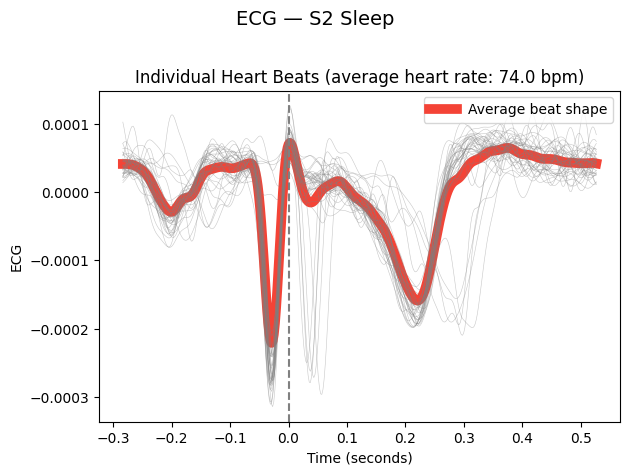

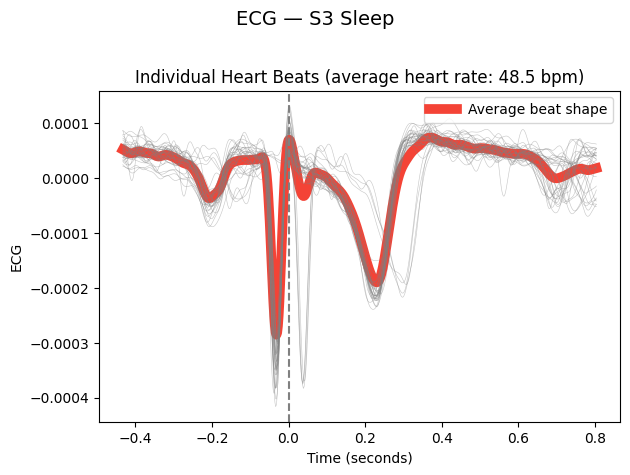

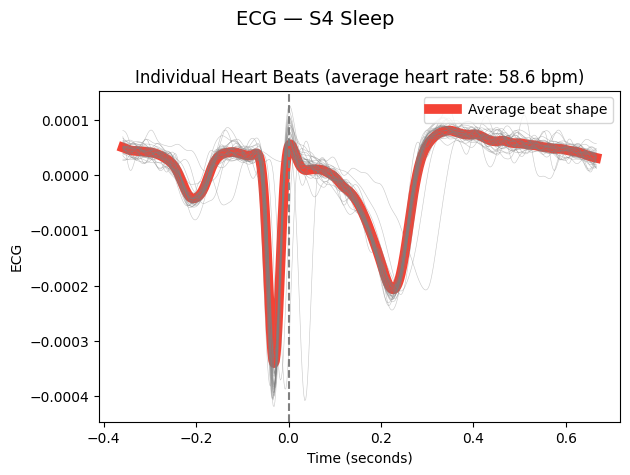

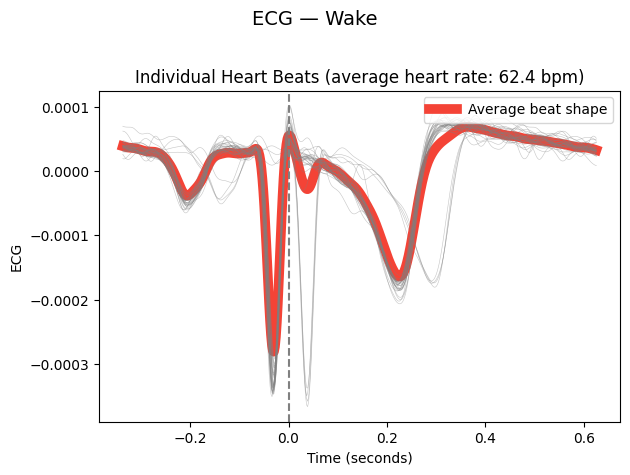

In [56]:
# Indivudual Heart Beat - REM Sleep
nk.ecg_segment(ecg_clean_rem, rpeaks=None, sampling_rate=sf, show=True)
plt.gcf().suptitle("ECG — REM Sleep", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Indivudual Heart Beat - S1 Sleep
nk.ecg_segment(ecg_clean_s1, rpeaks=None, sampling_rate=sf, show=True)
plt.gcf().suptitle("ECG — S1 Sleep", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Indivudual Heart Beat - S2 Sleep
nk.ecg_segment(ecg_clean_s2, rpeaks=None, sampling_rate=sf, show=True)
plt.gcf().suptitle("ECG — S2 Sleep", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Indivudual Heart Beat - S3 Sleep
nk.ecg_segment(ecg_clean_s3, rpeaks=None, sampling_rate=sf, show=True)
plt.gcf().suptitle("ECG — S3 Sleep", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Indivudual Heart Beat - S4 Sleep
nk.ecg_segment(ecg_clean_s4, rpeaks=None, sampling_rate=sf, show=True)
plt.gcf().suptitle("ECG — S4 Sleep", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Indivudual Heart Beat - WAKE Sleep
nk.ecg_segment(ecg_clean_wake, rpeaks=None, sampling_rate=sf, show=True)
plt.gcf().suptitle("ECG — Wake", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

In [59]:
def hrv_per_epoch(ecg, epochs, sf):
    rows = []
    for i, (t0, t1) in enumerate(epochs):
        a, b = int(t0*sf), int(t1*sf)
        x = ecg[a:b]
        try:
            signals, info = nk.ecg_process(x, sampling_rate=sf)
            # mean HR from ECG_Rate (bpm)
            hr_mean = float(np.nanmean(signals["ECG_Rate"]))

            # HRV metrics (time domain) from detected R-peaks
            hrv = nk.hrv_time(info, sampling_rate=sf).iloc[0].to_dict()

            rows.append({
                "epoch": i,
                "start_s": float(t0),
                "hr_mean_bpm": hr_mean,
                "rmssd_ms": float(hrv.get("HRV_RMSSD", np.nan)),
                "sdnn_ms": float(hrv.get("HRV_SDNN", np.nan)),
                "pnn50_pct": float(hrv.get("HRV_pNN50", np.nan)),
                "n_beats": int(len(info["ECG_R_Peaks"])) if "ECG_R_Peaks" in info else np.nan,
                "ok": True
            })
        except Exception as e:
            rows.append({"epoch": i, "start_s": float(t0), "ok": False, "error": str(e)})

    return pd.DataFrame(rows)


hrv_rem = hrv_per_epoch(ecg_clean_rem, rem_epochs, sf)

hrv_s1 = hrv_per_epoch(ecg_clean_s1, S1_epochs, sf)

hrv_s2 = hrv_per_epoch(ecg_clean_s2, S2_epochs, sf)

hrv_s3 = hrv_per_epoch(ecg_clean_s3, S3_epochs, sf)

hrv_s4 = hrv_per_epoch(ecg_clean_s4, S4_epochs, sf)

hrv_wake = hrv_per_epoch(ecg_clean_wake, wake_epochs, sf)

for name, df_ in [
    ("REM", hrv_rem),
    ("S1",  hrv_s1),
    ("S2",  hrv_s2),
    ("S3",  hrv_s3),
    ("S4",  hrv_s4),
    ("WAKE", hrv_wake),
]:
    display(df_.head(10).style.set_caption(f"HRV per epoch — {name}").format(precision=3))


c:\Users\carlo\miniforge3\envs\dtu02452\Lib\site-packages\neurokit2\ecg\ecg_clean.py:106: NeuroKitWarning: There are 1024 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(
c:\Users\carlo\miniforge3\envs\dtu02452\Lib\site-packages\neurokit2\ecg\ecg_clean.py:165: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  ecg_signal = pd.DataFrame.pad(pd.Series(ecg_signal))
c:\Users\carlo\miniforge3\envs\dtu02452\Lib\site-packages\neurokit2\ecg\ecg_clean.py:106: NeuroKitWarning: There are 1024 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(
c:\Users\carlo\miniforge3\envs\dtu02452\Lib\site-packages\neurokit2\ecg\ecg_clean.py:165: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  ecg_signal = pd.DataFrame.pad(pd.Series(ecg_signal))
c:\Users\carlo\miniforge3\envs\dtu02452\Lib\site-packages\neurokit

,epoch,start_s,ok,error
0,0,13620.000,False,"The length of the input vector x must be greater than padlen, which is 18."
1,1,13650.000,False,"The length of the input vector x must be greater than padlen, which is 18."
2,2,13680.000,False,"The length of the input vector x must be greater than padlen, which is 18."
3,3,13710.000,False,"The length of the input vector x must be greater than padlen, which is 18."
4,4,13740.000,False,"The length of the input vector x must be greater than padlen, which is 18."
5,5,13770.000,False,"The length of the input vector x must be greater than padlen, which is 18."
6,6,13800.000,False,"The length of the input vector x must be greater than padlen, which is 18."
7,7,13830.000,False,"The length of the input vector x must be greater than padlen, which is 18."
8,8,13860.000,False,"The length of the input vector x must be greater than padlen, which is 18."
9,9,13890.000,False,"The length of the input vector x must be greater than padlen, which is 18."


,epoch,start_s,hr_mean_bpm,rmssd_ms,sdnn_ms,pnn50_pct,n_beats,ok,error
0,0,690.000,56.765,226.247,213.274,7.407,28.000,True,nan
1,1,720.000,58.912,155.035,151.242,7.143,29.000,True,nan
2,2,750.000,51.610,428.408,395.487,20.000,26.000,True,nan
3,3,780.000,61.017,10.054,10.390,0.000,6.000,True,nan
4,4,1170.000,57.383,332.231,301.820,18.519,28.000,True,nan
5,5,1260.000,56.138,288.180,276.206,7.407,28.000,True,nan
6,6,4320.000,nan,nan,nan,nan,nan,False,"The length of the input vector x must be greater than padlen, which is 18."
7,7,4350.000,nan,nan,nan,nan,nan,False,"The length of the input vector x must be greater than padlen, which is 18."
8,8,4380.000,nan,nan,nan,nan,nan,False,"The length of the input vector x must be greater than padlen, which is 18."
9,9,4410.000,nan,nan,nan,nan,nan,False,"The length of the input vector x must be greater than padlen, which is 18."


,epoch,start_s,hr_mean_bpm,rmssd_ms,sdnn_ms,pnn50_pct,n_beats,ok,error
0,0,810.000,63.772,322.944,296.014,20.000,31.000,True,nan
1,1,840.000,66.723,327.853,242.665,80.000,6.000,True,nan
2,2,870.000,65.650,12.633,20.072,0.000,8.000,True,nan
3,3,900.000,62.082,263.576,262.058,6.667,31.000,True,nan
4,4,930.000,65.196,5.638,4.026,0.000,5.000,True,nan
5,5,1200.000,60.512,546.768,378.654,10.714,29.000,True,nan
6,6,1230.000,65.610,13.475,23.940,0.000,27.000,True,nan
7,7,1290.000,nan,nan,nan,nan,nan,False,integer division or modulo by zero
8,8,1320.000,66.002,13.009,22.307,0.000,13.000,True,nan
9,9,1350.000,71.532,15.644,27.568,0.000,34.000,True,nan


,epoch,start_s,ok,error
0,0,1560.000,False,"The length of the input vector x must be greater than padlen, which is 18."
1,1,1590.000,False,"The length of the input vector x must be greater than padlen, which is 18."
2,2,1620.000,False,"The length of the input vector x must be greater than padlen, which is 18."
3,3,1650.000,False,"The length of the input vector x must be greater than padlen, which is 18."
4,4,1680.000,False,"The length of the input vector x must be greater than padlen, which is 18."
5,5,1710.000,False,"The length of the input vector x must be greater than padlen, which is 18."
6,6,1740.000,False,"The length of the input vector x must be greater than padlen, which is 18."
7,7,1770.000,False,"The length of the input vector x must be greater than padlen, which is 18."
8,8,1800.000,False,"The length of the input vector x must be greater than padlen, which is 18."
9,9,1830.000,False,"The length of the input vector x must be greater than padlen, which is 18."


,epoch,start_s,hr_mean_bpm,rmssd_ms,sdnn_ms,pnn50_pct,n_beats,ok,error
0,0,1890.000,60.196,272.773,267.051,10.714,29.000,True,nan
1,1,1920.000,64.372,49.479,32.227,16.667,19.000,True,nan
2,2,1950.000,62.051,258.301,253.340,6.667,31.000,True,nan
3,3,1980.000,65.880,81.555,61.671,53.125,33.000,True,nan
4,4,2010.000,62.204,41.511,47.022,16.667,13.000,True,nan
5,5,2040.000,65.537,13.306,19.421,0.000,31.000,True,nan
6,6,2070.000,nan,nan,nan,nan,nan,False,integer division or modulo by zero
7,7,2100.000,67.518,253.751,250.196,6.250,33.000,True,nan
8,8,2130.000,72.043,28.727,26.950,10.000,11.000,True,nan
9,9,2160.000,68.396,62.499,54.631,27.273,34.000,True,nan


,epoch,start_s,hr_mean_bpm,rmssd_ms,sdnn_ms,pnn50_pct,n_beats,ok,error
0,0,0.000,65.439,79.397,52.258,48.387,32.000,True,nan
1,1,30.000,nan,nan,nan,nan,nan,False,integer division or modulo by zero
2,2,60.000,58.342,566.417,553.435,25.000,29.000,True,nan
3,3,90.000,66.000,255.049,271.897,12.500,33.000,True,nan
4,4,120.000,66.836,210.362,130.373,50.000,33.000,True,nan
5,5,150.000,65.100,301.480,272.663,61.290,32.000,True,nan
6,6,180.000,73.738,255.733,190.099,71.429,36.000,True,nan
7,7,210.000,65.885,316.027,299.801,45.161,32.000,True,nan
8,8,240.000,69.540,251.045,248.014,24.242,34.000,True,nan
9,9,270.000,69.154,293.297,266.526,64.706,35.000,True,nan
